In [1]:
import numpy as np

In [2]:
p = np.load("/home/dongwooc/lustrespace/20211023_limlam_Ka10/13579a.npz")

'''Lets load up the cube array'''
p['map_cube']

array([[[1.89249077e+00, 2.16109931e+00, 1.77736660e+00, ...,
         2.04816666e+00, 2.22907875e+00, 2.39605094e+00],
        [1.02641743e+00, 1.16654749e+00, 1.11129588e+00, ...,
         8.27914549e-01, 1.03020737e+00, 1.13667022e+00],
        [1.50990291e+00, 1.64172254e+00, 1.68854358e+00, ...,
         3.00874177e-01, 3.61729545e-01, 3.16188612e-01],
        ...,
        [2.48749000e-01, 3.70374946e-01, 5.62024715e-01, ...,
         1.08947702e+00, 1.43051294e+00, 1.67851417e+00],
        [2.95000396e-01, 4.64146407e-01, 6.98319753e-01, ...,
         6.41048500e-01, 8.47485379e-01, 6.01814348e-01],
        [8.58094699e-02, 1.09089000e-01, 1.33905305e-01, ...,
         1.18625747e+00, 6.31716808e-01, 4.71218152e-01]],

       [[3.50452277e+00, 3.85839628e+00, 4.01410900e+00, ...,
         1.20007415e+00, 9.64157345e-01, 6.51580522e-01],
        [1.53447318e+00, 1.77379340e+00, 2.40560736e+00, ...,
         9.32525410e-01, 1.93953708e+00, 1.70333138e+00],
        [3.55671101e-01, 

In [3]:
print(p['map_cube'].shape)

(30, 30, 512)


In [4]:
print(p['map_cube'].size)

460800


In [5]:
''' The output above reads (30, 30, 512), this means the array has 3 dimensions; the first and second dimensions have 30 elements, while the third has 512 elements'''

' The output above reads (30, 30, 512), this means the array has 3 dimensions; the first and second dimensions have 30 elements, while the third has 512 elements'

In [6]:
'''Now, we must generate an array with the same shape as map_cube and containing random samples from a Gaussian distribution'''
mu, sigma = 0, 0.1
'''mu represents mean, while sigma is the standard dev.'''
s = np.random.normal(mu, sigma, (30, 30, 512))
s.flatten()

array([ 0.02848577, -0.05199519,  0.2215814 , ...,  0.06506161,
       -0.10805001,  0.08404077])

In [7]:
'''This is me double checking the standard deviation'''
print(abs(sigma - np.std(s, ddof=1)))


'''This is me double checking the mean'''
print(abs(mu - np.mean(s)))

'''Here, I am just double checking that I made the array with the correct shape:'''
print(s.shape)

4.128504065196992e-05
0.00019344618677114665
(30, 30, 512)


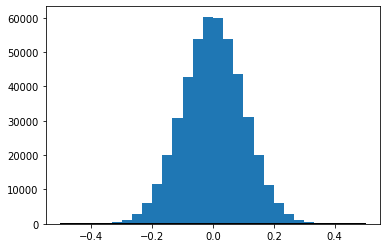

In [65]:
import matplotlib.pyplot as plt

count, bins, ignored = plt.hist(s.flatten(), 30, range=(-0.5, 0.5))
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(- (bins -mu)**2 / (2 * sigma**2) ), linewidth = 2, color = 'k')
plt.show()


In [9]:
'''Answering part 4 of the prelude section:

If Im understanding this correctly, the question asks if there is/ should be a difference in the values of the curve and the bars that are graphed.

The answer is rather simple; the bars are discrete, while the curve is a probability function that almost approximates/averages the bars, or so it looks that way; thus the height of a single bar is slightly different then the curve at that point. However, the integral P(x) (or the area under its curve) on an interval would be the same as the integral of the histagram on that same interval. It is using these properties that we can create an equation that relates these properties.'''

'Answering part 4 of the prelude section:\n\nIf Im understanding this correctly, the question asks if there is/ should be a difference in the values of the curve and the bars that are graphed.\n\nThe answer is rather simple; the bars are discrete, while the curve is a probability function that almost approximates/averages the bars, or so it looks that way; thus the height of a single bar is slightly different then the curve at that point. However, the integral P(x) (or the area under its curve) on an interval would be the same as the integral of the histagram on that same interval. It is using these properties that we can create an equation that relates these properties.'

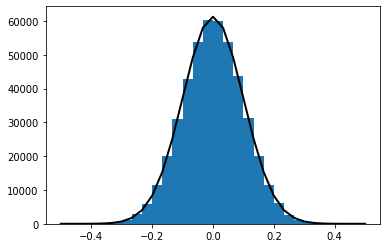

In [10]:
'''This is where I need to find a parameter that helps relate/express the expected value of a bin at a certain point and the corresponding value of the probability distribution function.

To do this, essentially we need to convert probability to counts, or histagram to probability units. After many mathematical calculations, which are described in greater detail on the latex file

Essentially, here that parameter is 460,800.
'''

count, bins, ignored = plt.hist(s.flatten(), 30, range=(-0.5, 0.5))
plt.plot(bins, (460800/30) * (1/(sigma * np.sqrt(2 * np.pi)) * np.exp(- (bins - mu)**2 / (2 * sigma**2) )), linewidth = 2, color = 'k')
plt.show()

In [11]:
'''Next part of the project: Histograms in 1D'''

'Next part of the project: Histograms in 1D'

In [12]:
'''Generating a noise cube and adding it to map_cube:'''

o = np.array([p['map_cube']])

mu, sigma = 0, 10
q = np.random.normal(mu, sigma, (30, 30, 512))
q.flatten()

simulated = np.add(o,q)
simulated.flatten()

array([ -5.45282733,   6.37265756,  -4.94996325, ...,  -9.69486096,
       -10.05673391,  -8.85958015])

mean =  1.1784175768950682
standard deviation =  10.089939468646119


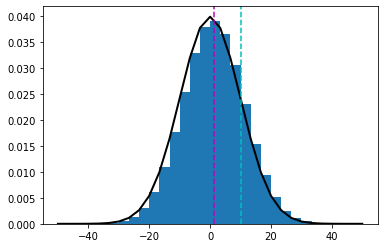

In [13]:
'''Plotting the histagram of the simulated noise cube and finding mean and stan. dev.'''

import statistics
count, bins, ignored = plt.hist\
    (simulated.flatten(), 30, range=(-50., 50), density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi))\
         * np.exp(- (bins -mu)**2 / (2 * sigma**2) ), linewidth = 2, color = 'k')

m = statistics.mean(simulated.flatten())
sd = statistics.stdev(simulated.flatten())
plt.axvline(m, color='m', linestyle='dashed')
plt.axvline(sd, color='c', linestyle='dashed')
print("mean = ", m)
print("standard deviation = ", sd)


plt.show()

In [14]:
def bin_centers(bins):
    """ Given bins, find their centers
    and return them
    
    Parameters:
    bins-------array-like, produced by plt.hist
    
    Returns:
    bin_centers----array-like, the bin_centers
    """
    bin_center = np.array([])
    for i in range(len(bins)-1):
        bin_center = np.append(bin_center, bins[i] + (bins[i+1] - bins[i])/2.)
    return bin_center

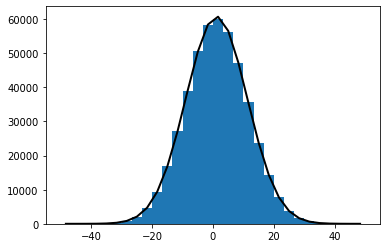

In [50]:
'''Using the new sigma(standard deviation) and mu(mean) value to plot the corresponding Gaussian distribution at each bin centre'''

import statistics
sigma = 10.089939468646119
mu = 1.1784175768950682
nbins = 30
x_min = -50.
x_max = 50.
bin_center = bin_centers(bins)
P_2 = (simulated.size*(x_max - x_min)/nbins) * \
             (1/(sigma * np.sqrt(2 * np.pi)) * np.exp(- (bin_center - mu)**2 \
                    / (2 * sigma**2) ))
count, bins, ignored = plt.hist(simulated.flatten(), nbins, range=(x_min, x_max))
plt.plot(bin_center, P_2, linewidth = 2, color = 'k')
plt.show()

In [51]:
'''To answer the question posed in part 3 of 1D histograms....There is a slight difference between the actual histogram and the Gaussian approximation. When you look closely, you see the corners of each bar poking out of the Gaussian curve. They are very similar, however there is a small difference detected'''

'To answer the question posed in part 3 of 1D histograms....There is a slight difference between the actual histogram and the Gaussian approximation. When you look closely, you see the corners of each bar poking out of the Gaussian curve. They are very similar, however there is a small difference detected'

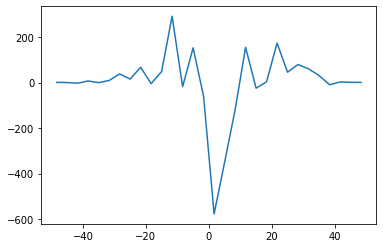

In [52]:
'''KL divergence: P_1log(P_1/P_2)'''
P_1 = count
        
def DKL(P_1, P_2):
    dkl = P_1 * np.log((P_1+1.e-10)/P_2)
    return dkl
dkl = DKL(count, P_2)

plt.plot(bin_center, dkl)

In [18]:
'''The function moves back and fourth from zero. At times it goes toward zero, and at times it goes away from zero. Because of this non-equilibrium, oscilliating pattern....we can conclude the above plot does in fact have distinct non-gaussian components '''

'The function moves back and fourth from zero. At times it goes toward zero, and at times it goes away from zero. Because of this non-equilibrium, oscilliating pattern....we can conclude the above plot does in fact have distinct non-gaussian components '

In [19]:
'''Generating another noise cube'''
mu, sigma = 0, 5
r = np.random.normal(mu, sigma, (30, 30, 512))
r.flatten()

simulated_new = np.add(o,r)
simulated_new.flatten()

array([ 1.73813014,  8.00734848,  8.00579401, ..., -0.98597495,
        0.68870377,  6.8127813 ])

mean =  1.1715657638315984
standard deviation =  5.18232540410375


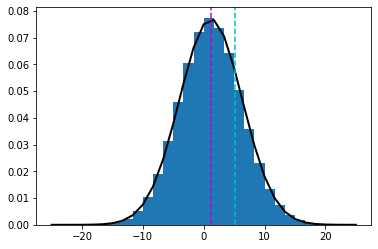

In [55]:
import statistics
count, bins, ignored = plt.hist\
    (simulated_new.flatten(), 30, range=(-25., 25), density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi))\
         * np.exp(- (bins -mu)**2 / (2 * sigma**2) ), linewidth = 2, color = 'k')

m = statistics.mean(simulated_new.flatten())
sd = statistics.stdev(simulated_new.flatten())
plt.axvline(m, color='m', linestyle='dashed')
plt.axvline(sd, color='c', linestyle='dashed')
print("mean = ", m)
print("standard deviation = ", sd)


plt.show()

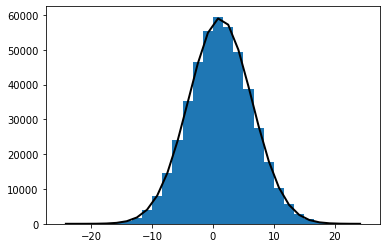

In [56]:
import statistics
sigma = 5.18232540410375
mu = 1.1715657638315984
nbins = 30
x_min = -25.
x_max = 25.
bin_center = bin_centers(bins)
Q_2 = (simulated_new.size*(x_max - x_min)/nbins) * \
             (1/(sigma * np.sqrt(2 * np.pi)) * np.exp(- (bin_center - mu)**2 \
                    / (2 * sigma**2) ))
count, bins, ignored = plt.hist(simulated_new.flatten(), nbins, range=(x_min, x_max))
plt.plot(bin_center, Q_2, linewidth = 2, color = 'k')
plt.show()

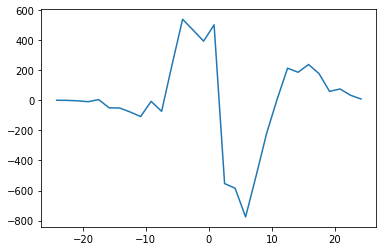

In [57]:
'''KL divergence: P_1log(P_1/P_2)'''
P_1 = count

def DKL2(P_1, Q_2):
    dkl2 = P_1 * np.log((P_1+1.e-10)/Q_2)
    return dkl2

dkl2 = DKL2(count, Q_2)
plt.plot(bin_center, dkl2)

mean =  1.17097923985969
standard deviation =  2.8504401207860806


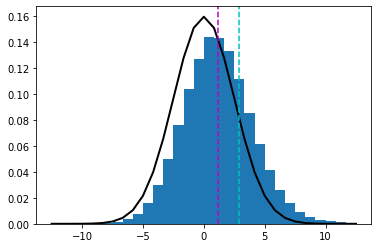

In [60]:
'''Generating another noise cube'''
mu, sigma = 0, 2.5
t = np.random.normal(mu, sigma, (30, 30, 512))
t.flatten()

simulated_new2 = np.add(o,t)
simulated_new2.flatten()

import statistics
count, bins, ignored = plt.hist\
    (simulated_new2.flatten(), 30, range=(-12.5, 12.5), density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi))\
         * np.exp(- (bins -mu)**2 / (2 * sigma**2) ), linewidth = 2, color = 'k')

m = statistics.mean(simulated_new2.flatten())
sd = statistics.stdev(simulated_new2.flatten())
plt.axvline(m, color='m', linestyle='dashed')
plt.axvline(sd, color='c', linestyle='dashed')
print("mean = ", m)
print("standard deviation = ", sd)


plt.show()

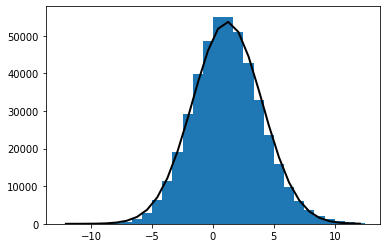

In [63]:
sigma = 2.8504401207860806
mu = 1.17097923985969
nbins = 30
x_min = -12.5
x_max = 12.5
bin_center = bin_centers(bins)
Q_3 = (simulated_new2.size*(x_max - x_min)/nbins) * \
             (1/(sigma * np.sqrt(2 * np.pi)) * np.exp(- (bin_center - mu)**2 \
                    / (2 * sigma**2) ))
count, bins, ignored = plt.hist(simulated_new2.flatten(), nbins, range=(x_min, x_max))
plt.plot(bin_center, Q_3, linewidth = 2, color = 'k')
plt.show()

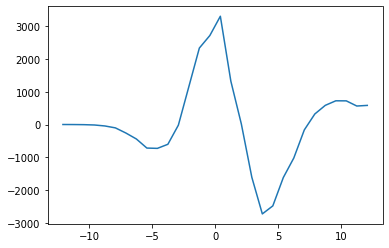

In [64]:
'''KL divergence: P_1log(P_1/P_2)'''
P_1 = count

def DKL3(P_1, Q_3):
    dkl3 = P_1 * np.log((P_1+1.e-10)/Q_3)
    return dkl3

dkl3 = DKL3(count, Q_3)
plt.plot(bin_center, dkl3)